# Функции нескольких переменных

In [1]:
import numpy as np

In [2]:
a=1/(1+np.exp(-2))
print (round(a, 2))

0.88


In [3]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


In [4]:
a, b, c = symbols('a b c', real=True)
f = (5-a-2*b)**2

print (diff(f, b))

4*a + 8*b - 20


In [5]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])

In [6]:
print (sol)

[(-2, -1), (-1, -2), (1, 2), (2, 1)]


In [7]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2-3*y, 0)
eq2 = Eq(3*y**2-3*x, 0)
 
sol = solve([eq1, eq2], [x, y])

In [8]:
sol

[(0, 0),
 (1, 1),
 ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2),
 ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]

# Оптимизация

In [9]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

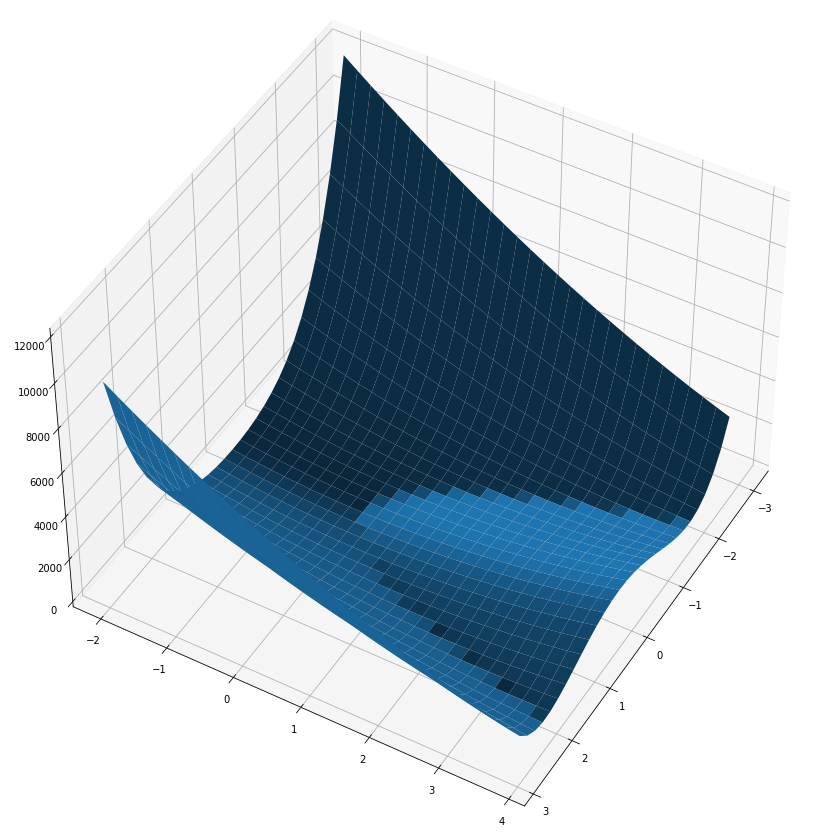

In [10]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

In [11]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Допустим, у нас есть некоторая точка  в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [12]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [13]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(result_point.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


In [14]:
a = -11/np.sqrt(5)
print (round(a,2))

-4.92


In [15]:
solveset(Eq(4/(x**2)+9/(4*(x**2))-1, 0), x)

{-5/2, 5/2}

In [16]:
4*-0.8+3*-3.75

-14.45

In [17]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [18]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)

In [19]:
print (sols)

[(1.00000000000000, 0.0, 0.707106781186548)]


In [20]:
from sympy import *
x, y, z, w = symbols(' x y z w')
f= 2*x*y+2*y*z+2*x*z+w*(x*y*z-1)
fx=f.diff(x)
fy=f.diff(y)
fz=f.diff(z)
fw=f.diff(w)
sols=solve([fx, fy, fz, fw], x,y,z,w)

print (sols)

[(1, 1, 1, -4), (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I), (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]


# Градиент

Для вычисления градиента в Python есть специальная функция — gradient() из библиотеки NumPy. Градиент вычисляется на заданной N-мерной сетке с шагом, который можно задать вручную.

In [21]:
import numpy as np

f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
 
np.gradient(f)

C:\Users\kuzin\AppData\Local\Temp\ipykernel_21972\3091878085.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

In [22]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2, то есть, по сути, среднее арифметическое для значений:

In [23]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

In [24]:
a=Eq(-18.2+6*x+18*y, 0)
b=Eq(-62.6+18*x+70*y, 0)

solve([a, b], x,y)

{x: 1.53333333333333, y: 0.500000000000000}

In [25]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

In [26]:
gr=np.gradient(f, 7)

In [27]:
gr[7]

1.4285714285714286

# Алгоритм градиентного спуска

In [28]:
# функция
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [29]:
# градиент
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

Также запрограммируем простейший вариант для градиентного спуска:

In [30]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

Напишем функцию, которая будет строить график:

In [31]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

Визуализируем и получим следующее движение градиентного спуска к минимуму:

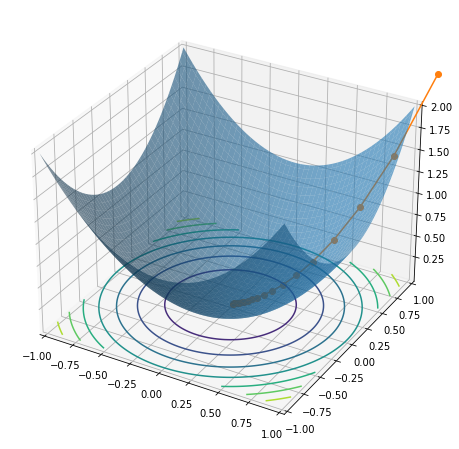

In [32]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [39]:
round(1- (1-np.exp(-1/10*7)),3)

0.497